# Explanatory Data Analysis (EDA)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib import rcParams

## Load datasets

In [3]:
df_ams_weekday = pd.read_csv('../datasets/amsterdam_weekdays.csv')
df_ams_weekend = pd.read_csv('../datasets/amsterdam_weekends.csv')
df_ath_weekday = pd.read_csv('../datasets/athens_weekdays.csv')
df_ath_weekend = pd.read_csv('../datasets/athens_weekends.csv')
df_bar_weekday = pd.read_csv('../datasets/barcelona_weekdays.csv')
df_bar_weekend = pd.read_csv('../datasets/barcelona_weekends.csv')
df_ber_weekday = pd.read_csv('../datasets/berlin_weekdays.csv')
df_ber_weekend = pd.read_csv('../datasets/berlin_weekends.csv')
df_bud_weekday = pd.read_csv('../datasets/budapest_weekdays.csv')
df_bud_weekend = pd.read_csv('../datasets/budapest_weekends.csv')
df_lis_weekday = pd.read_csv('../datasets/lisbon_weekdays.csv')
df_lis_weekend = pd.read_csv('../datasets/lisbon_weekends.csv')
df_lon_weekday = pd.read_csv('../datasets/london_weekdays.csv')
df_lon_weekend = pd.read_csv('../datasets/london_weekends.csv')
df_par_weekday = pd.read_csv('../datasets/paris_weekdays.csv')
df_par_weekend = pd.read_csv('../datasets/paris_weekends.csv')
df_rom_weekday = pd.read_csv('../datasets/rome_weekdays.csv')
df_rom_weekend = pd.read_csv('../datasets/rome_weekends.csv')
df_vie_weekday = pd.read_csv('../datasets/vienna_weekdays.csv')
df_vie_weekend = pd.read_csv('../datasets/vienna_weekends.csv')


## Concat Dataset and Add `country` and `is_weekend` columns

In [7]:
cities = ['amsterdam', 'athens', 'barcelona', 'berlin', 'budapest', 
          'lisbon', 'london', 'paris', 'rome', 'vienna']
dataframes = []

# Loop through the cities and process both weekday and weekend DataFrames
for city in cities:
    # Read weekday and weekend data
    df_weekday = pd.read_csv(f'../datasets/{city}_weekdays.csv')
    df_weekend = pd.read_csv(f'../datasets/{city}_weekends.csv')
    
    # Add the `country` and `is_weekend` columns
    df_weekday['country'] = city.capitalize()
    df_weekday['is_weekend'] = 0
    df_weekend['country'] = city.capitalize()
    df_weekend['is_weekend'] = 1
    
    # Append to the list
    dataframes.append(df_weekday)
    dataframes.append(df_weekend)

# Concatenate all DataFrames into one
concat_df = pd.concat(dataframes, ignore_index=True)

In [10]:
concat_df.head(5)

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,country,is_weekend
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,Amsterdam,0
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,Amsterdam,0
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,Amsterdam,0
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,Amsterdam,0
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,Amsterdam,0


## Univariate Analysis

In [11]:
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  51707 non-null  int64  
 1   realSum                     51707 non-null  float64
 2   room_type                   51707 non-null  object 
 3   room_shared                 51707 non-null  bool   
 4   room_private                51707 non-null  bool   
 5   person_capacity             51707 non-null  float64
 6   host_is_superhost           51707 non-null  bool   
 7   multi                       51707 non-null  int64  
 8   biz                         51707 non-null  int64  
 9   cleanliness_rating          51707 non-null  float64
 10  guest_satisfaction_overall  51707 non-null  float64
 11  bedrooms                    51707 non-null  int64  
 12  dist                        51707 non-null  float64
 13  metro_dist                  517

In [15]:
categorical_features = ['room_type', 'room_shared', 'room_private', 'person_capacity', 'host_is_superhost', 'multi', 'biz', 'bedrooms', 'country', 'is_weekend']
numerical_features = ['realSum', 'cleanliness_rating', 'guest_satisfaction_overall', 'dist', 'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', 'lng', 'lat']

In [17]:
# Convert data type
concat_df['person_capacity'] = concat_df['person_capacity'].astype(int)

In [19]:
concat_df[numerical_features].describe()

,realSum,cleanliness_rating,guest_satisfaction_overall,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,279.879591,9.390624,92.628232,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128
std,327.948386,0.954868,8.945531,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263
min,34.779339,2.000000,20.000000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000
25%,148.752174,9.000000,90.000000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510
50%,211.343089,10.000000,95.000000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690
75%,319.694287,10.000000,99.000000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885
max,18545.450285,10.000000,100.000000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410


C:\Users\fizuf\AppData\Local\Temp\ipykernel_29080\1634103370.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


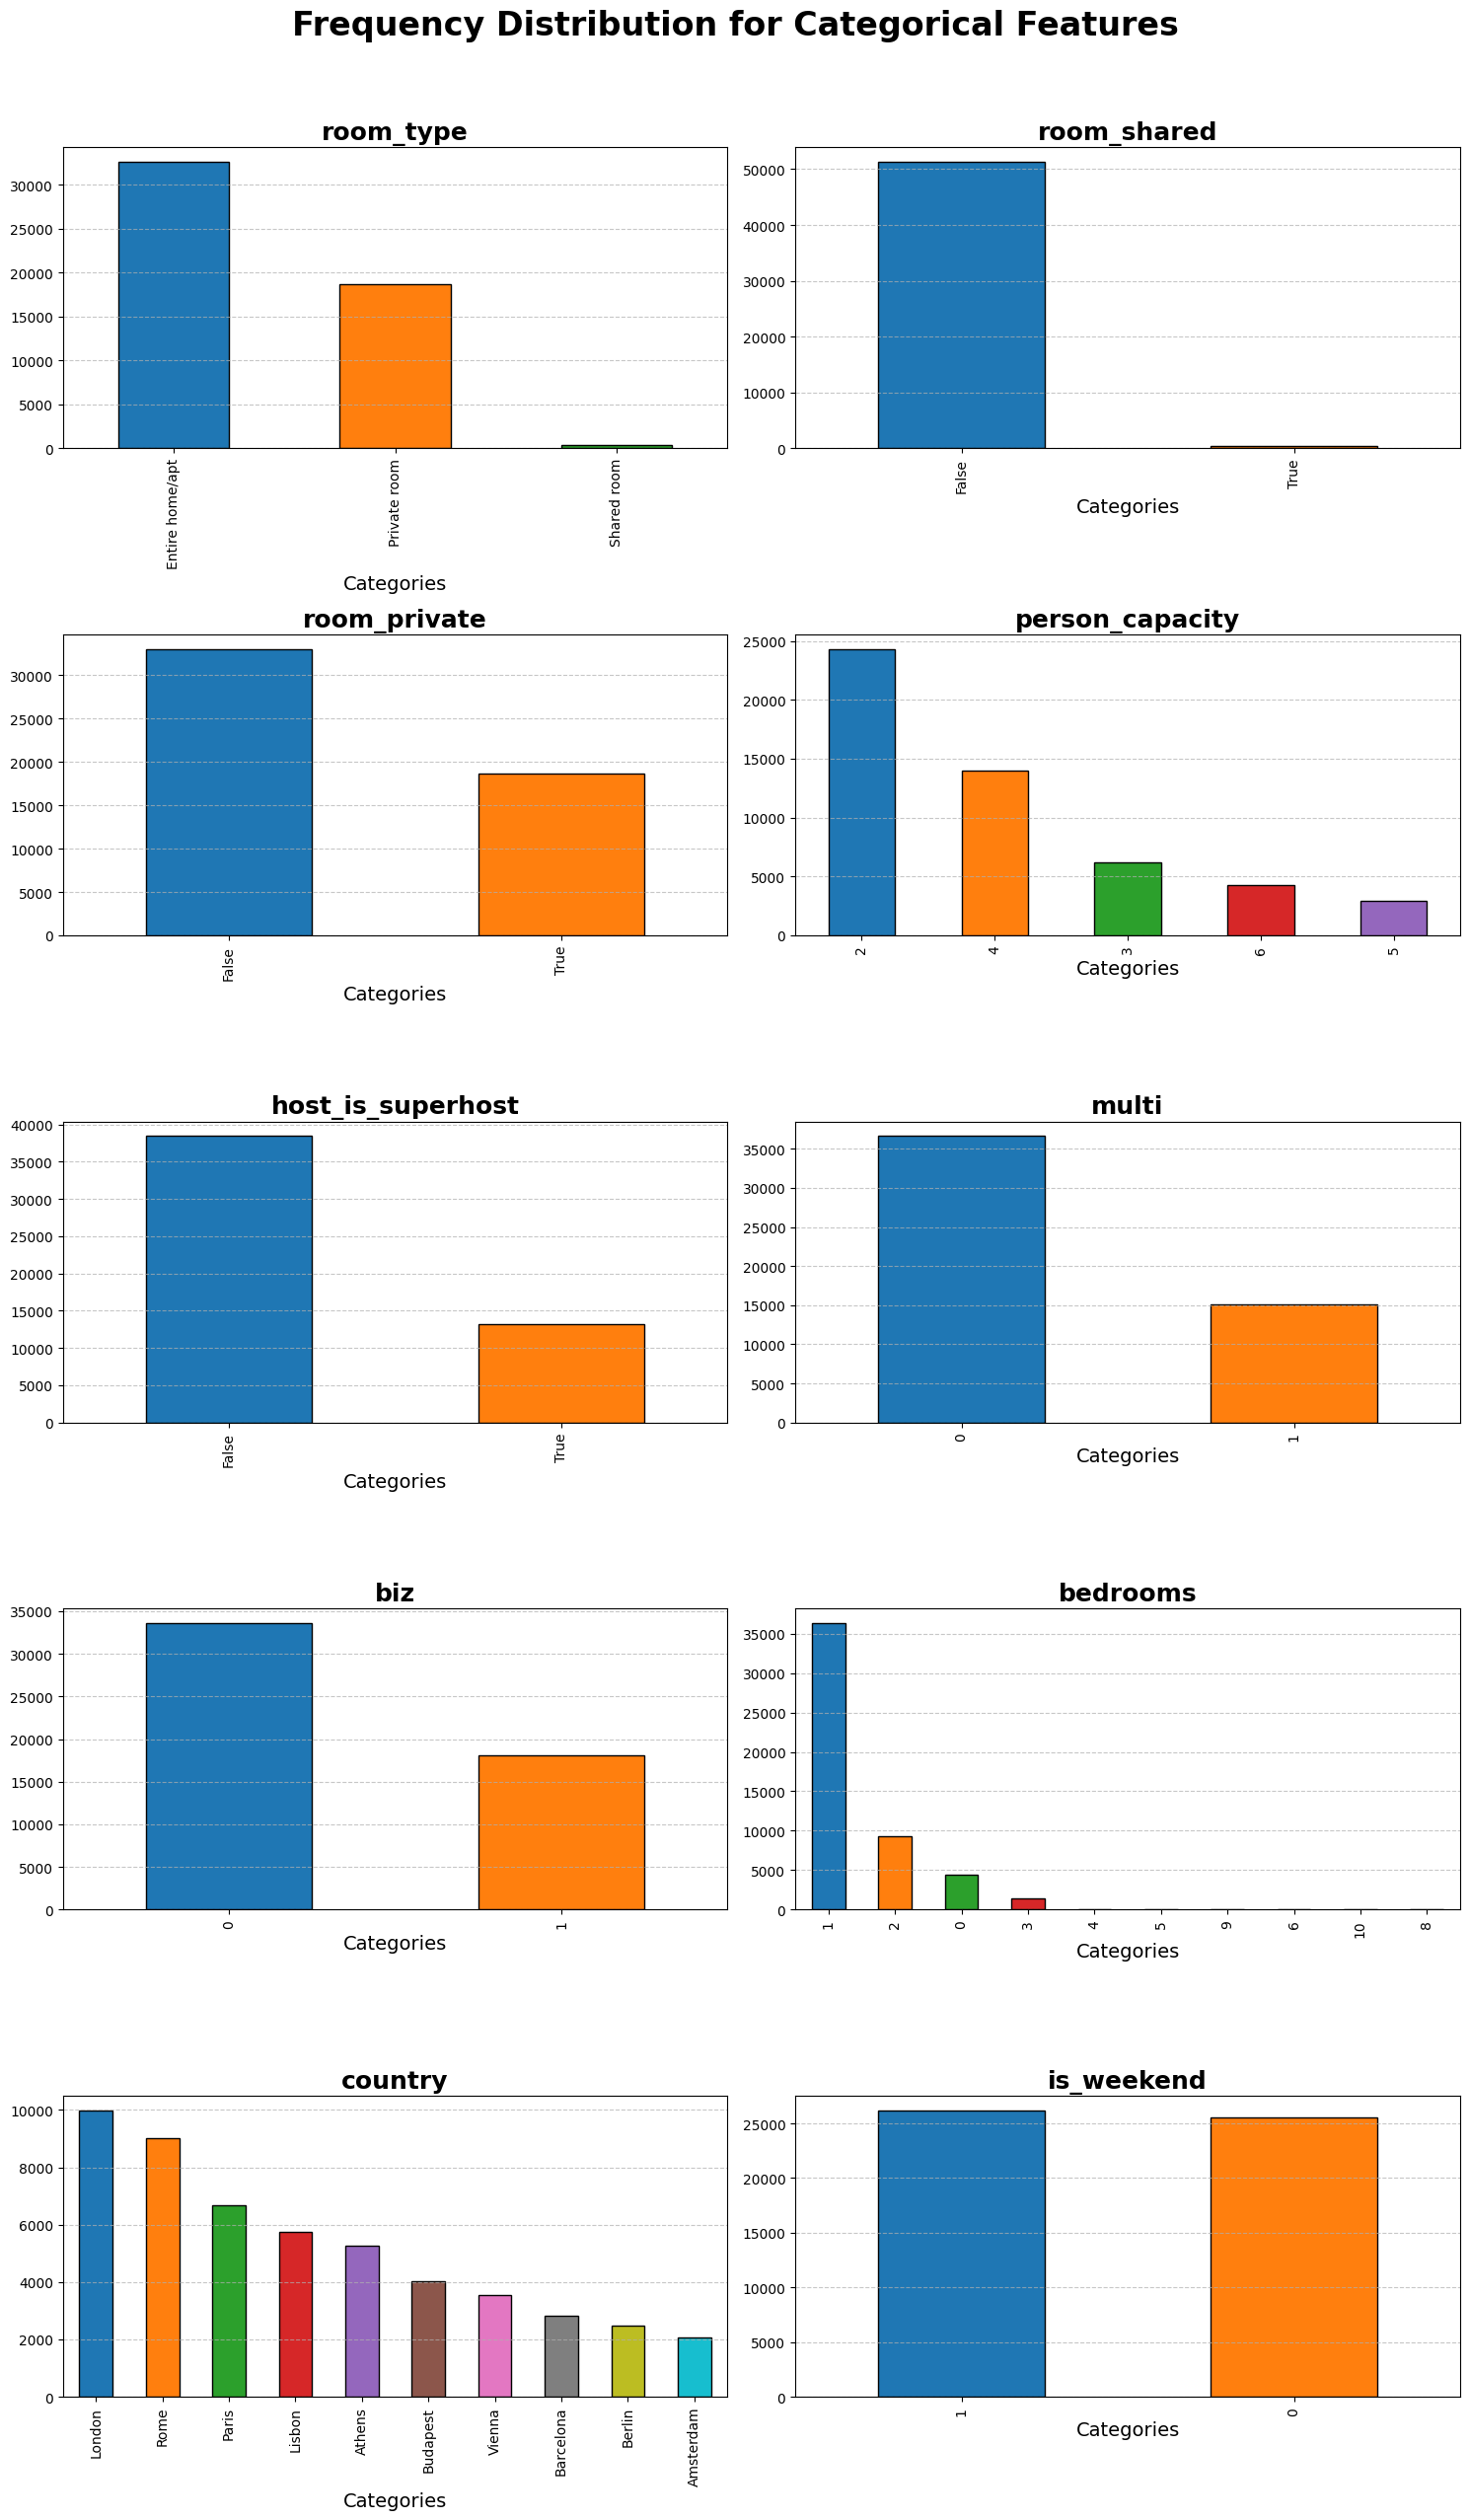

In [ ]:
num_rows = (len(categorical_features) + 1) // 2 
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows), constrained_layout=True)

fig.suptitle("Frequency Distribution for Categorical Features", fontsize=24, fontweight='bold', y=1.02)

for i, column in enumerate(categorical_features):
    row, col = divmod(i, 2) 
    ax = axes[row, col]
    
    value_counts = concat_df[column].value_counts()
    colors = plt.cm.tab10(range(len(value_counts)))
    
    value_counts.plot(kind="bar", ax=ax, color=colors, edgecolor="black")
    
    ax.set_title(f"{column}", fontsize=18, fontweight='bold')
    # ax.set_xlabel("Categories", fontsize=14)
    ax.set_ylabel("Frequency", fontsize=14)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

for j in range(len(categorical_features), num_rows * 2):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

In [22]:
concat_df.duplicated().sum()

0

- No Null data
- No duplicated data 